In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')
x = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
y = np.array([5, 4, 6, 5, 8, 7], dtype=np.float64)

2.2359287054409007
-2.8756097560975604
[-2.8756097560975604, -0.6396810506566597, 1.596247654784241, 3.8321763602251417, 6.0681050656660425, 8.304033771106944, 10.539962476547844, 12.775891181988744, 15.011819887429645, 17.247748592870547, 19.48367729831145, 21.719606003752347, 23.95553470919325, 26.19146341463415, 28.427392120075048, 30.663320825515953, 32.89924953095685, 35.13517823639775, 37.371106941838654, 39.60703564727955, 41.84296435272046, 44.078893058161356, 46.314821763602254, 48.55075046904316, 50.78667917448406, 53.022607879924955, 55.25853658536586, 57.49446529080676, 59.730393996247656, 61.966322701688554, 64.20225140712947, 66.43818011257036, 68.67410881801126, 70.91003752345216, 73.14596622889306, 75.38189493433397, 77.61782363977487, 79.85375234521577, 82.08968105065667, 84.32560975609756]


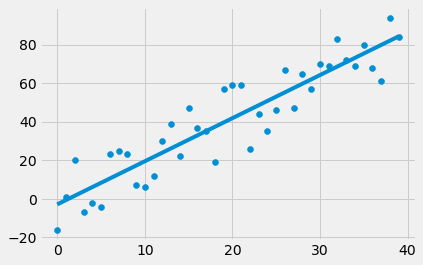

In [12]:
def creating_dataset(hm, variance, step=2, correlation=False):
    val = 1
    y = []
    for i in range(hm):
        y_val = val + random.randrange(-variance, variance)
        y.append(y_val)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation== 'neg':
            val -= step
        x = [i for i in range(len(y))]
    return np.array(x, dtype=np.float64), np.array(y, dtype=np.float64)

def slope_and_intercept_line_best_fit(x, y):
    gradient = ((mean(x) * mean(y)) - (mean(x * y))) / ((mean(x)) ** 2 - mean(x ** 2))
    y_intercept = mean(y) - (gradient * mean(x))

    return gradient, y_intercept


x, y = creating_dataset(40, 20, 2, correlation='pos')

m, b = slope_and_intercept_line_best_fit(x, y)
print(m)

print(b)

regression_line = [m * i + b for i in x]
print(regression_line)

plt.scatter(x=x, y=y)
plt.plot(x, regression_line)
plt.show()

In [13]:
def squared_error(y_original, y_line):
    return sum((y_line - y_original) ** 2)


def coefficient_of_determination(y_original, y_line):
    y_mean_line = [mean(y_original) for _ in y_original]
    squared_error_regression = squared_error(y_original, y_line)
    squared_error_y_mean = squared_error(y_original, y_mean_line)
    return 1 - (squared_error_regression / squared_error_y_mean)


r_squared = coefficient_of_determination(y, regression_line)
print(r_squared)

0.8370516200723263
